In [1]:
import re
import json
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import importlib
import squarify

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
import random
import os
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import importlib

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from matplotlib.ticker import FuncFormatter
# y 축에 실제 숫자 범위로 표시하기
def currency_formatter(x, pos):
    """
    숫자를 통화 형식으로 포맷팅하는 함수
    """
    return f'{x:,.0f}'

In [4]:
from sklearn.preprocessing import MinMaxScaler
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

# 1. 부동산 일반-부동산 관리 (상권분석)

In [5]:
ls "data/주요상권별에너지"

ES1001AD00101MM2207_csv.csv  ES1001AD00101MM2301_csv.csv
ES1001AD00101MM2208_csv.csv  ES1001AD00101MM2302_csv.csv
ES1001AD00101MM2209_csv.csv  ES1001AD00101MM2303_csv.csv
ES1001AD00101MM2210_csv.csv  ES1001AD00101MM2304_csv.csv
ES1001AD00101MM2211_csv.csv  ES1001AD00101MM2305_csv.csv
ES1001AD00101MM2212_csv.csv  ES1001AD00101MM2306_csv.csv


In [6]:
rep_col1 = {
    'TRDAR_NO': '상권번호',
    'TRDAR_NM': '상권명',
    'CTPR_CD': '시도코드',
    'CTPR_NM': '시도명',
    'SIGNGU_CD': '시군구코드',
    'SIGNGU_NM': '시군구명',
    'TRDAR_ISE_TOTL_BILD_CNT': '상권내총건축물수',
    'TRDAR_ISE_1KIND_NGHBRHD_LVLH_FCLTY_CNT': '상권내1종근린생활시설수',
    'TRDAR_ISE_2KIND_NGHBRHD_LVLH_FCLTY_CNT': '상권내2종근린생활시설수',
    'TRDAR_ISE_CLTUR_AND_MTNG_FCLTY_CNT': '상권내문화및집회시설수',
    'TRDAR_ISE_RLGN_LVLH_FCLTY_CNT': '상권내종교생활시설수',
    'TRDAR_ISE_NTSL_FCLTY_CNT': '상권내판매시설수',
    'TRDAR_ISE_MLFLT_CNT': '상권내의료시설수',
    'TRDAR_ISE_OVNTY_FCLTY_CNT': '상권내노유자시설수',
    'TRDAR_ISE_NVTT_FCLTY_CNT': '상권내수련원시설수',
    'TRDAR_ISE_EXRCS_FCLTY_CNT': '상권내운동시설수',
    'TRDAR_ISE_ACMT_CNT': '상권내숙박시설수',
    'TRDAR_ISE_WAF_FCLTY_CNT': '상권내위락시설수',
    'TRDAR_ISE_GAS_TOTL_USQNT': '상권내가스총사용량',
    'TRDAR_ISE_FTRM_TOTL_USQNT': '상권내전기총사용량',
    'CMRC_PUP_BULD_GAS_USQNT': '상업용건물가스사용량',
    'CMRC_PUP_BULD_FTRM_USQNT': '상업용건물전기사용량',
    'TRDAR_CRDNT_CONT': '상권좌표내용',
    'DATA_STRD_YM': '데이터기준년월'
}

rep_col2 = {
    'BSDI_NO': '상권번호',
    'BSDI_NM': '상권명',
    'CTPR_CD': '시도코드',
    'CTPR_NM': '시도명',
    'SIGNGU_CD': '시군구코드',
    'SIGNGU_NM': '시군구명',
    'BSDI_TODB_CNT': '상권내총건축물수',
    'BSDI_COCFC_CNT': '상권내1종근린생활시설수',
    'BSDI_CTCFC_CNT': '상권내2종근린생활시설수',
    'BSDI_CTAFC_CNT': '상권내문화및집회시설수',
    'BSDI_RGFC_CNT': '상권내종교생활시설수',
    'BSDI_SLFC_CNT': '상권내판매시설수',
    'BSDI_MLFLT_CNT': '상권내의료시설수',
    'BSDI_ERFC_CNT': '상권내노유자시설수',
    'BSDI_TNFC_CNT': '상권내수련원시설수',
    'BSDI_SPFC_CNT': '상권내운동시설수',
    'BSDI_ACMT_CNT': '상권내숙박시설수',
    'BSDI_RCFC_CNT': '상권내위락시설수',
    'BSDI_GAS_TOUQ': '상권내가스총사용량',
    'BSDI_ELEC_TOUQ': '상권내전기총사용량',
    'CMBD_GAS_USQNT': '상업용건물가스사용량',
    'CMBD_ELEC_USQNT': '상업용건물전기사용량',
    'CRDNT': '상권좌표내용',
    'DATA_STRD_DT': '데이터기준년월'
}

In [7]:
folder_path = "data/주요상권별에너지"

# 빈 DataFrame을 생성하여 데이터를 담을 준비
combined_df = pd.DataFrame()

# 주어진 폴더 내의 모든 파일을 반복해서 처리
for filename in os.listdir(folder_path):
    if filename.endswith(".csv") and "MM" in filename:  # CSV 파일이면서 "MM"을 포함하는 파일만 고려
        file_path = os.path.join(folder_path, filename)
        
        # 'MM' 뒤의 4자리를 추출하여 '데이터기준년월'에 20을 추가하여 날짜로 사용
        date_str = "20" + filename.split("MM")[1][:4]
        
        # 파일을 읽어와 데이터프레임에 추가
        df = pd.read_csv(file_path, sep='|')
        
        # 데이터기준년월 컬럼을 날짜로 설정
        df['데이터기준년월tmp'] = pd.to_datetime(date_str, format='%Y%m')
        df['데이터기준년월'] = pd.to_datetime(date_str, format='%Y%m')
        
        # 필요한 작업 수행
        df.rename(columns=rep_col1, inplace=True)
        df.rename(columns=rep_col2, inplace=True)
        
        # 데이터프레임을 합치기
        combined_df = pd.concat([combined_df, df], ignore_index=True)

# 결과 확인
combined_df = combined_df[combined_df['시도명'] == '서울특별시']
combined_df = combined_df.drop(columns=['데이터기준년월','시도명', '시도코드'])  # 상권좌표내용
combined_df.rename(columns={'데이터기준년월tmp':'데이터기준년월'}, inplace=True)
combined_df = combined_df.sort_values('데이터기준년월')
combined_df.reset_index(inplace=True, drop=True)
combined_df

,상권번호,상권명,시군구코드,시군구명,상권내총건축물수,상권내1종근린생활시설수,상권내2종근린생활시설수,상권내문화및집회시설수,상권내종교생활시설수,상권내판매시설수,...,상권내수련원시설수,상권내운동시설수,상권내숙박시설수,상권내위락시설수,상권내가스총사용량,상권내전기총사용량,상업용건물가스사용량,상업용건물전기사용량,상권좌표내용,데이터기준년월
0,9182,종로5가역_3,11110,종로구,375.0,126.0,142.0,0.0,0.0,0.0,...,0.0,0.0,15.0,5.0,400554,1276547,191650,921062,MULTIPOLYGON (((127.002901127695 37.5752720993...,2022-07-01
1,9274,장지역,11710,송파구,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,326169,0,285843,0,MULTIPOLYGON (((127.121432163337 37.4778404344...,2022-07-01
2,9273,잠실역 롯데월드,11710,송파구,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6711742,10606565,6711742,10606565,MULTIPOLYGON (((127.095885090325 37.5119935443...,2022-07-01
3,9272,잠실역,11710,송파구,11.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2423546,5114307,246353,994140,MULTIPOLYGON (((127.10317565023 37.51675826956...,2022-07-01
4,9271,신천역,11710,송파구,389.0,73.0,140.0,0.0,1.0,1.0,...,1.0,0.0,24.0,0.0,1579830,5320979,1337632,4305907,MULTIPOLYGON (((127.083007320802 37.5114963348...,2022-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,9296,선정릉역_2,11680,강남구,229.0,19.0,56.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,267220,1286609,196088,634565,MULTIPOLYGON (((127.043225521811 37.5123753305...,2023-06-01
3044,9295,선정릉역_1,11680,강남구,68.0,3.0,15.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,191829,772321,89019,224030,MULTIPOLYGON (((127.04411216891 37.51018783886...,2023-06-01
3045,9294,선릉역_4,11680,강남구,318.0,24.0,104.0,1.0,3.0,0.0,...,0.0,0.0,5.0,1.0,2873769,9265951,1118902,2188892,MULTIPOLYGON (((127.057502484486 37.5047694823...,2023-06-01
3046,9347,총신대입구역_1,11590,동작구,301.0,99.0,76.0,0.0,2.0,1.0,...,0.0,0.0,3.0,0.0,582040,1665507,546491,1591243,MULTIPOLYGON (((126.980624125233 37.4889796915...,2023-06-01


In [8]:
from shapely.geometry import MultiPolygon


def parse_coords(coords_str):
    # 정규식을 사용하여 숫자와 소수점만 추출
    coordinates = re.findall(r'[-+]?\d*\.\d+|\d+', coords_str)
    # 추출된 값들을 실수형으로 변환하여 반환
    return [float(coord) for coord in coordinates]

# '상권좌표내용' 컬럼의 값에 대해 문자열로 처리
combined_df['상권좌표내용'] = combined_df['상권좌표내용'].astype(str)

# combined_df의 '상권좌표내용' 컬럼에 함수 적용하여 'geometry' 컬럼 생성
combined_df['geometry'] = combined_df['상권좌표내용'].apply(parse_coords)

# '상권좌표내용' 컬럼 제거 (필요에 따라)
combined_df.drop(columns=['상권좌표내용'], inplace=True)
combined_df.rename(columns={'geometry':'상권좌표내용'}, inplace=True)
combined_df

,상권번호,상권명,시군구코드,시군구명,상권내총건축물수,상권내1종근린생활시설수,상권내2종근린생활시설수,상권내문화및집회시설수,상권내종교생활시설수,상권내판매시설수,...,상권내수련원시설수,상권내운동시설수,상권내숙박시설수,상권내위락시설수,상권내가스총사용량,상권내전기총사용량,상업용건물가스사용량,상업용건물전기사용량,데이터기준년월,상권좌표내용
0,9182,종로5가역_3,11110,종로구,375.0,126.0,142.0,0.0,0.0,0.0,...,0.0,0.0,15.0,5.0,400554,1276547,191650,921062,2022-07-01,"[127.002901127695, 37.575272099336, 127.002674..."
1,9274,장지역,11710,송파구,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,326169,0,285843,0,2022-07-01,"[127.121432163337, 37.4778404344516, 127.12189..."
2,9273,잠실역 롯데월드,11710,송파구,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6711742,10606565,6711742,10606565,2022-07-01,"[127.095885090325, 37.5119935443618, 127.09477..."
3,9272,잠실역,11710,송파구,11.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2423546,5114307,246353,994140,2022-07-01,"[127.10317565023, 37.5167582695629, 127.098920..."
4,9271,신천역,11710,송파구,389.0,73.0,140.0,0.0,1.0,1.0,...,1.0,0.0,24.0,0.0,1579830,5320979,1337632,4305907,2022-07-01,"[127.083007320802, 37.5114963348022, 127.08030..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,9296,선정릉역_2,11680,강남구,229.0,19.0,56.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,267220,1286609,196088,634565,2023-06-01,"[127.043225521811, 37.5123753305824, 127.04321..."
3044,9295,선정릉역_1,11680,강남구,68.0,3.0,15.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,191829,772321,89019,224030,2023-06-01,"[127.04411216891, 37.5101878388615, 127.044106..."
3045,9294,선릉역_4,11680,강남구,318.0,24.0,104.0,1.0,3.0,0.0,...,0.0,0.0,5.0,1.0,2873769,9265951,1118902,2188892,2023-06-01,"[127.057502484486, 37.5047694823626, 127.05749..."
3046,9347,총신대입구역_1,11590,동작구,301.0,99.0,76.0,0.0,2.0,1.0,...,0.0,0.0,3.0,0.0,582040,1665507,546491,1591243,2023-06-01,"[126.980624125233, 37.4889796915266, 126.98061..."


In [9]:
combined_df['데이터기준년월'].drop_duplicates()

0      2022-07-01
254    2022-08-01
508    2022-09-01
762    2022-10-01
1016   2022-11-01
1270   2022-12-01
1524   2023-01-01
1778   2023-02-01
2032   2023-03-01
2286   2023-04-01
2540   2023-05-01
2794   2023-06-01
Name: 데이터기준년월, dtype: datetime64[ns]

In [10]:
for i in combined_df.columns:
    print(i)

상권번호
상권명
시군구코드
시군구명
상권내총건축물수
상권내1종근린생활시설수
상권내2종근린생활시설수
상권내문화및집회시설수
상권내종교생활시설수
상권내판매시설수
상권내의료시설수
상권내노유자시설수
상권내수련원시설수
상권내운동시설수
상권내숙박시설수
상권내위락시설수
상권내가스총사용량
상권내전기총사용량
상업용건물가스사용량
상업용건물전기사용량
데이터기준년월
상권좌표내용


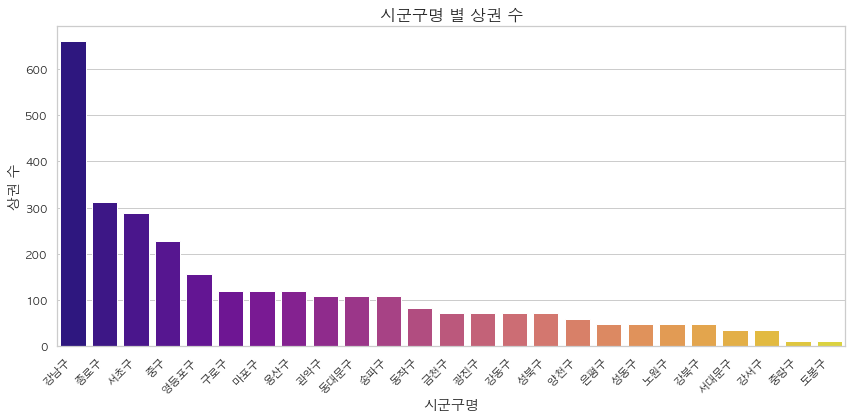

In [58]:
# 시군구명 별로 count value 계산
count_by_sigungu = combined_df['시군구명'].value_counts()

# Seaborn 스타일 설정
sns.set(style="whitegrid")
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x=count_by_sigungu.index, y=count_by_sigungu.values, palette="plasma")  # 색상을 'plasma'로 변경
plt.title('시군구명 별 상권 수', fontsize=16)
plt.xlabel('시군구명', fontsize=14)
plt.ylabel('상권 수', fontsize=14)
plt.xticks(rotation=45, ha='right')  # x축 라벨 회전
plt.tight_layout()  # 레이아웃 조절

plt.show()

In [12]:
# 시군구명 별로 상권명 확인
for sigungu, group_df in combined_df.groupby('시군구명'):
    print(f"시군구명: {sigungu}")
    print(group_df['상권명'].unique())
    print("\n")

시군구명: 강남구
['학동역_2' '학동사거리_1' '포이사거리' '포스코사거리_2' '포스코사거리_1' '코엑스' '청담역_2' '학동역_1'
 '한티역' '학동역_4' '학동역_3' '청담사거리_2' '청담사거리_1' '은마아파트입구사거리_4' '학동사거리_2'
 '은마아파트입구사거리_3' '은마아파트입구사거리_2' '역삼역_4' '강남구청역_1' '신사동사로수길_2' '강남역_5' '매봉역'
 '강남구청역_2' '은마아파트입구사거리_1' '선릉역_4' '선정릉역_2' '역삼역_3' '역삼역_2' '역삼역_1' '언주역_2'
 '언주역_1' '양재역_2' '압구정역' '선정릉역_1' '압구정 로데오거리_1' '신사역_2' '청담역_1' '청담사거리_3'
 '선릉역_3' '선릉역_2' '압구정 로데오거리_2' '삼성역_3' '선릉역_1' '수서역' '신사동가로수길_1' '강남역_3'
 '논현역_1' '논현역_2' '강남역_4' '대치역_2' '도산공원사거리_1' '뱅뱅사거리' '삼성역_1' '삼성역_2'
 '대치역_1']


시군구명: 강동구
['천호역_2' '천호역_1' '명일역' '둔촌동역' '고덕역' '길동역']


시군구명: 강북구
['수유역_3' '수유역_2' '수유역_1' '미아사거리역_1']


시군구명: 강서구
['송정역' '발산역' '강서구청']


시군구명: 관악구
['서울대입구역_3' '대학동' '서울대입구역_1' '사당역_1' '신림역_4' '신림역_3' '신림역_2' '신림역_1'
 '서울대입구역_2']


시군구명: 광진구
['어린이대공원' '군자역' '구의역' '건대입구역_2' '건대입구역_1' '강변테크노마트']


시군구명: 구로구
['구로역' '디지털단지오거리' '구로기계공구상_2' '구로기계공구상_1' '개봉동 현대아파트' '오류동' '신도림역' '대림역'
 '구로중앙유통단지' '가리봉시장(구로디지털오거리)']


시군구명: 금천구
['가산디지털단지역_3' '시흥4동' '시흥1동' '독산1동' '가산디지털단지역_1' '가산디

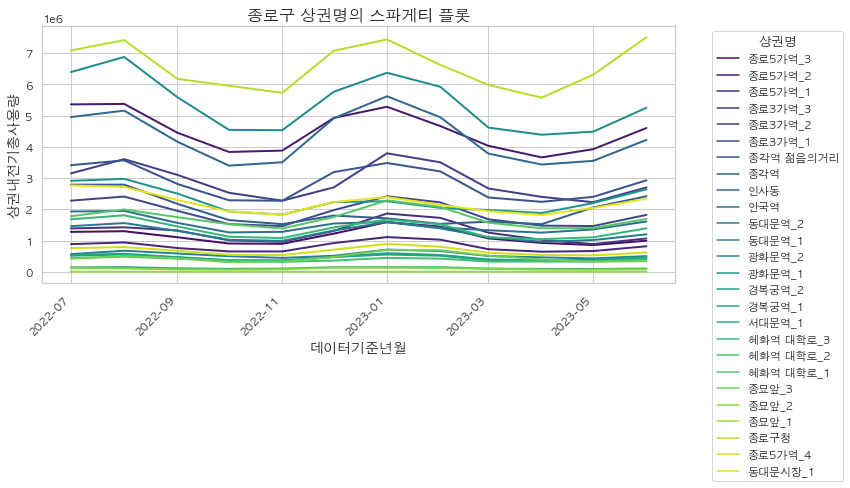

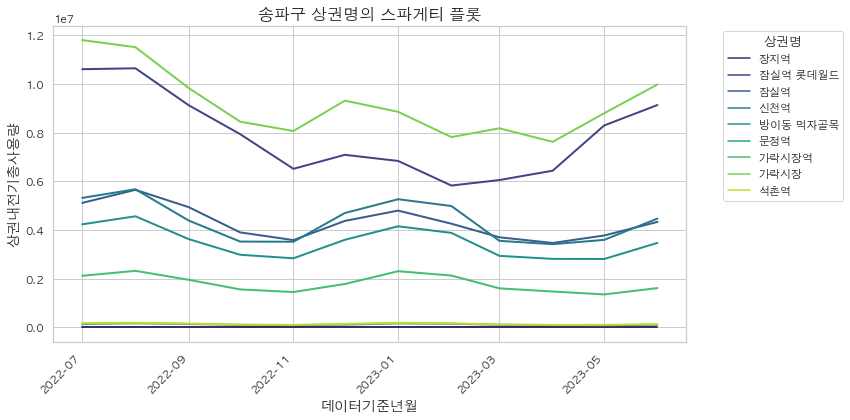

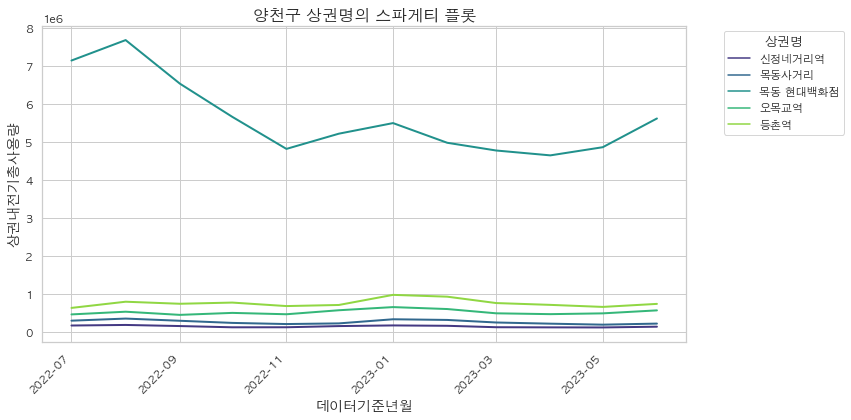

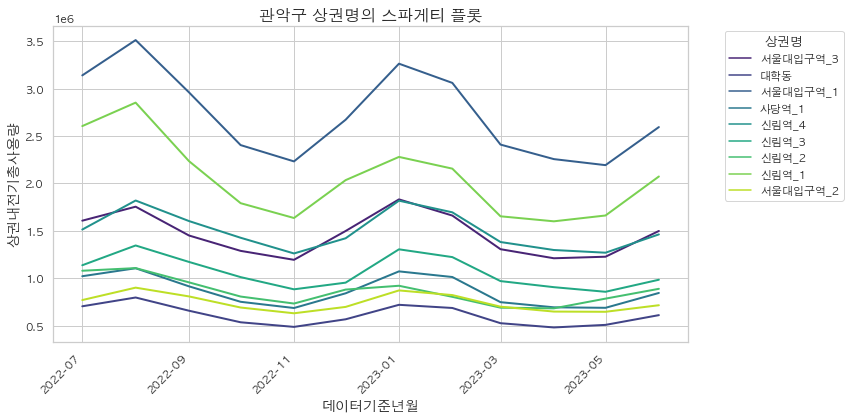

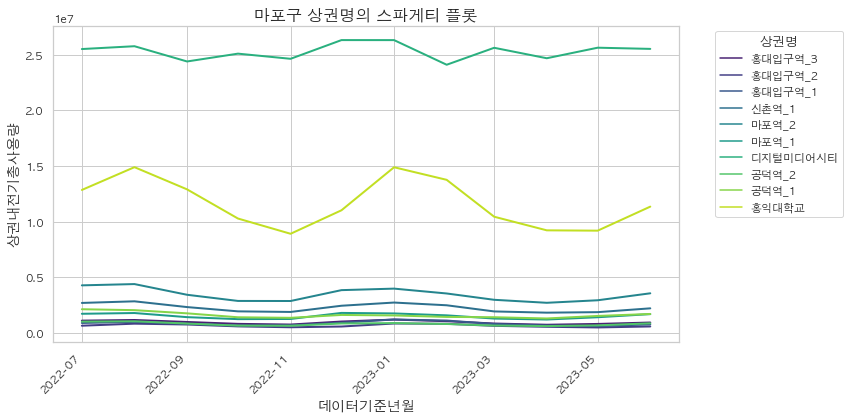

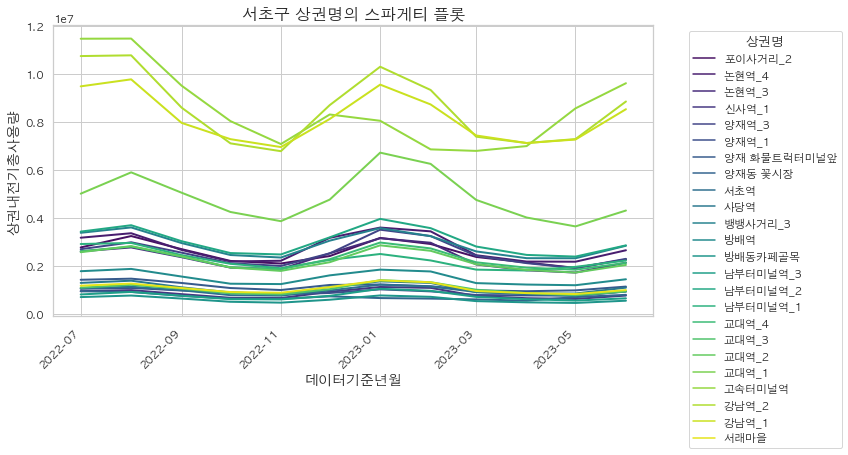

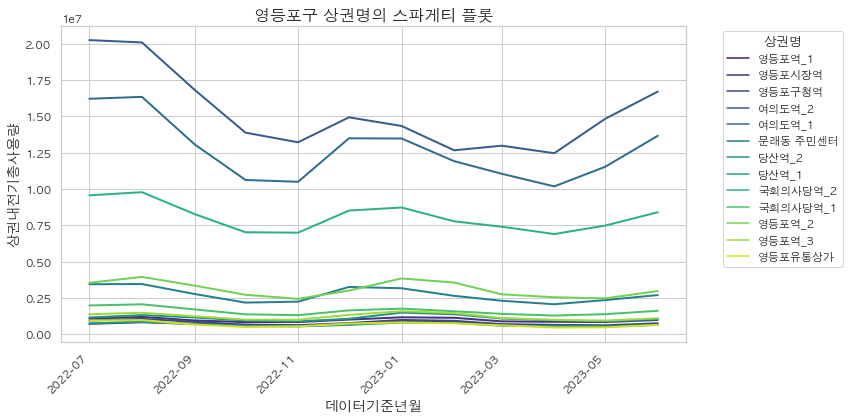

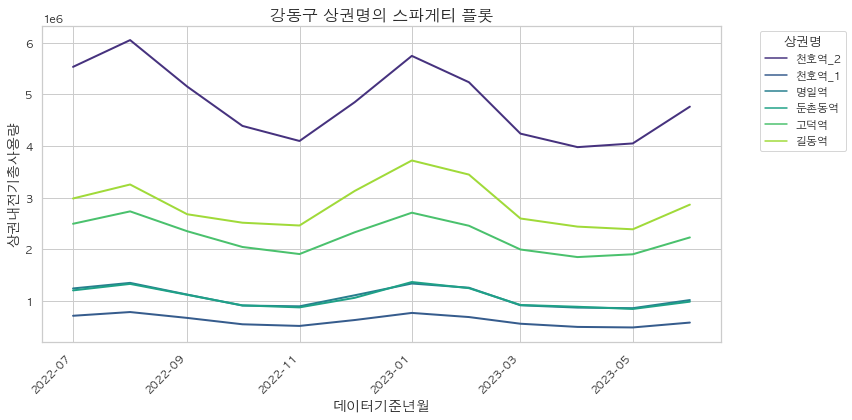

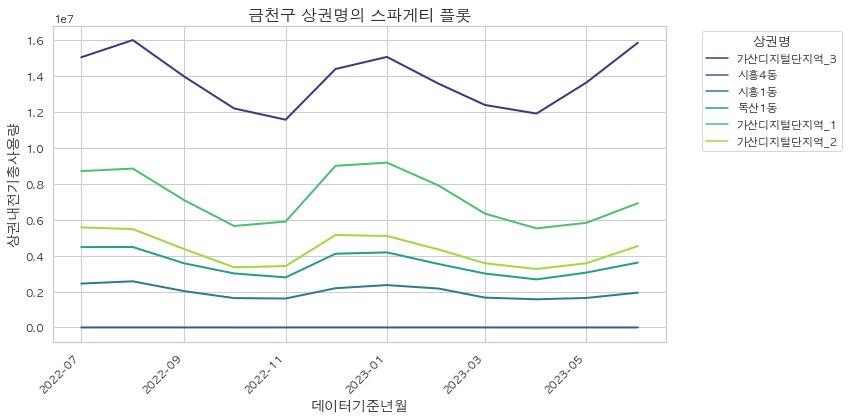

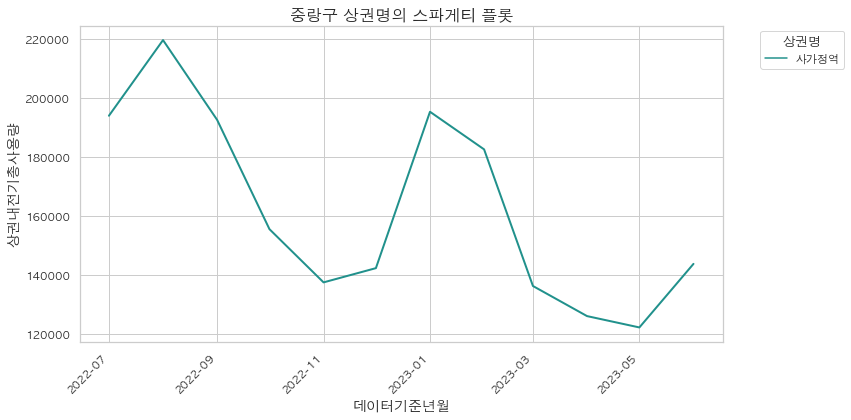

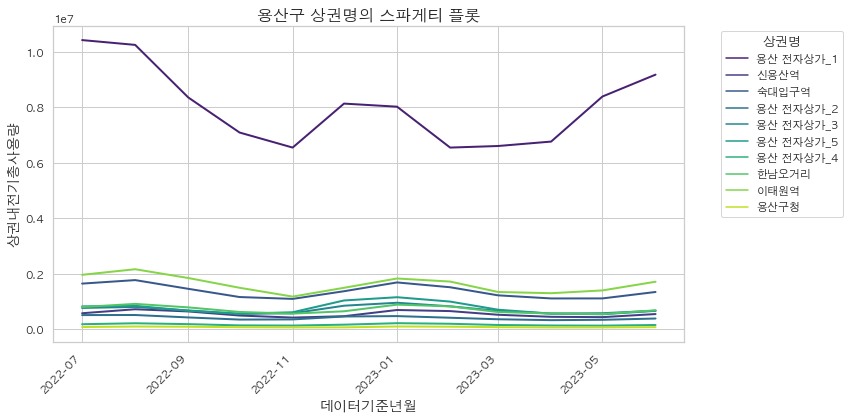

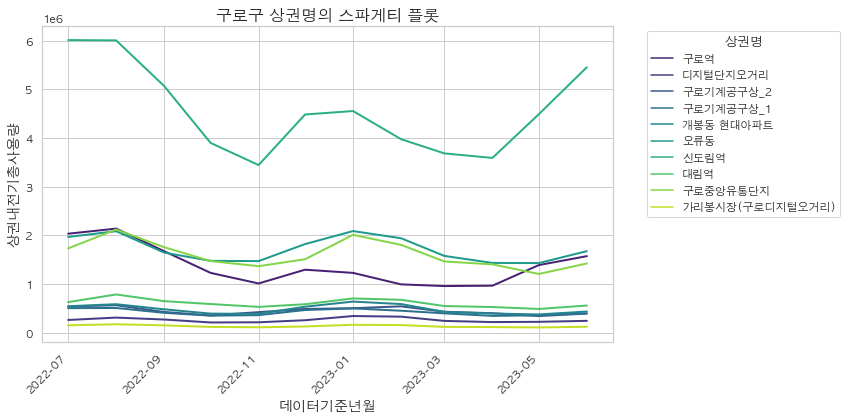

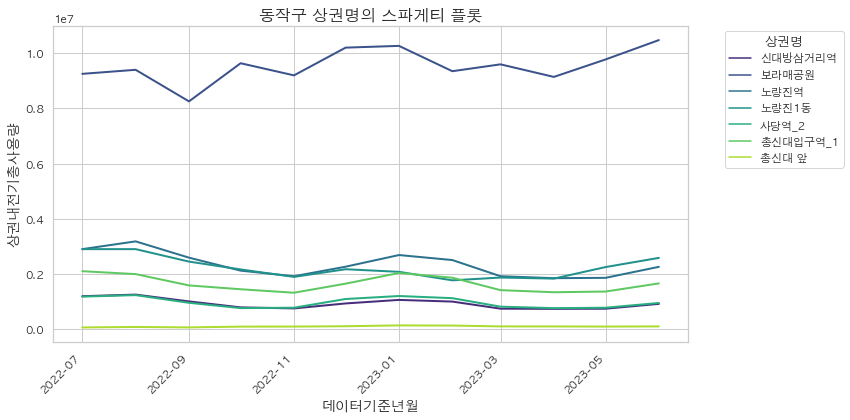

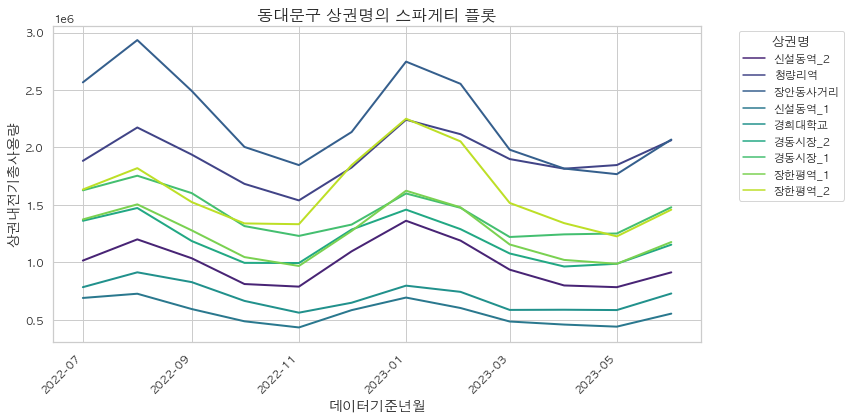

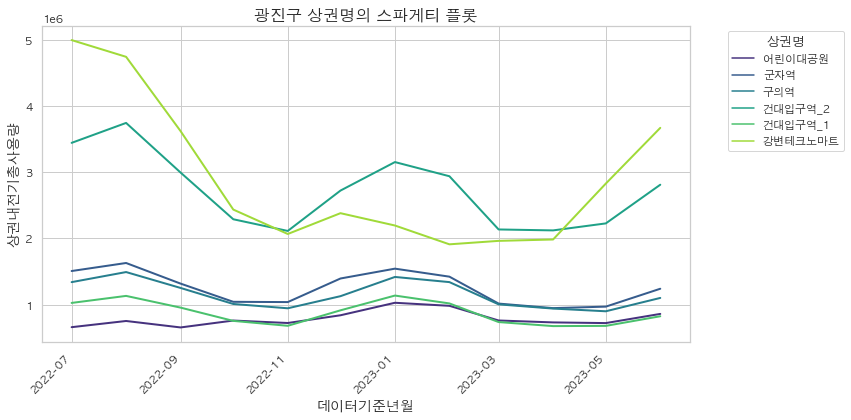

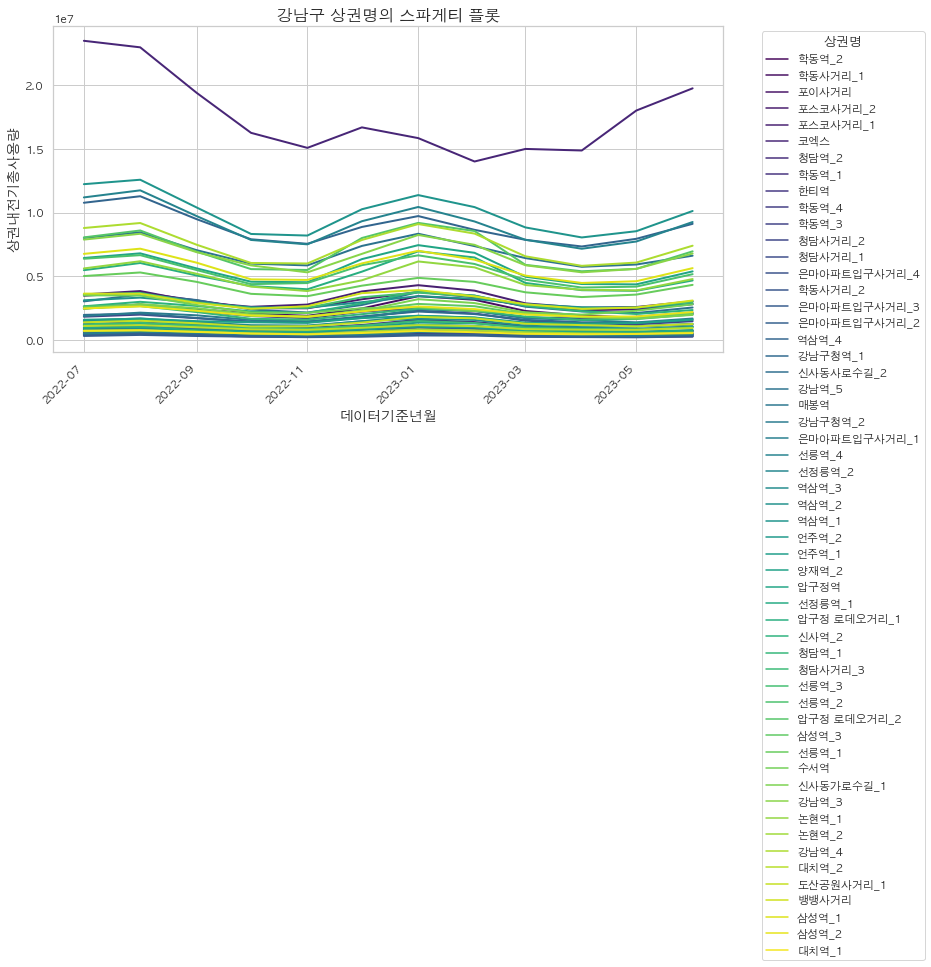

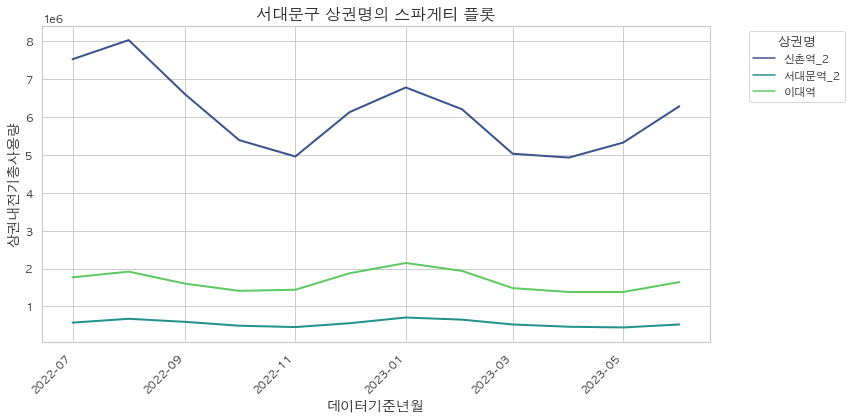

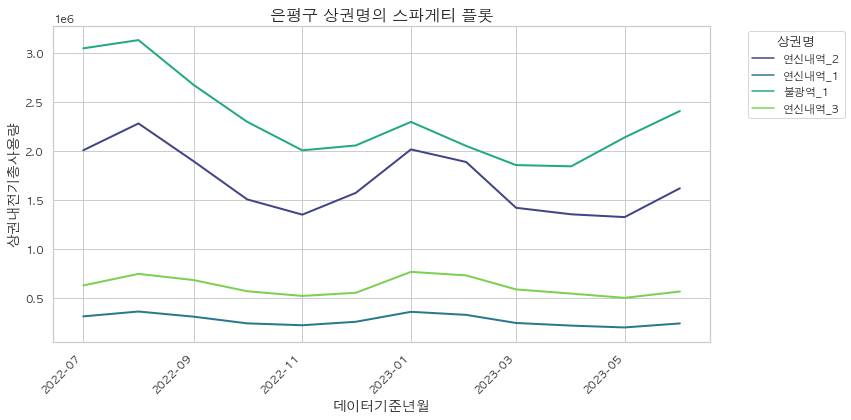

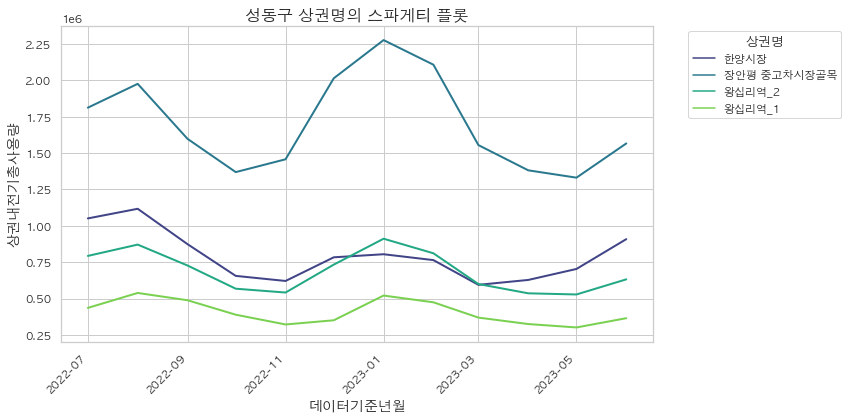

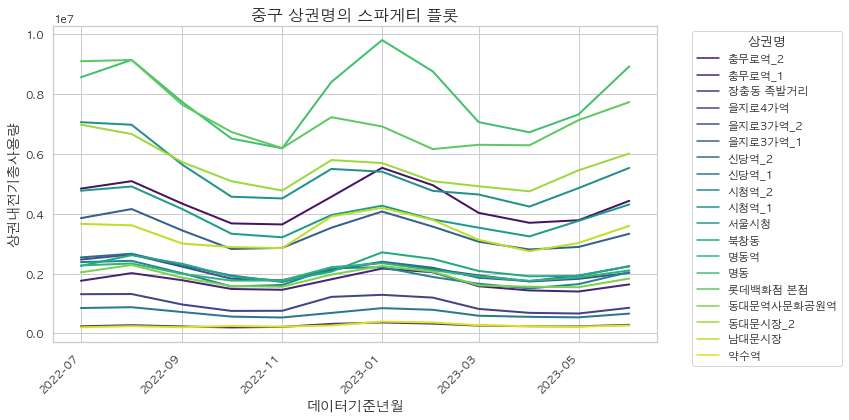

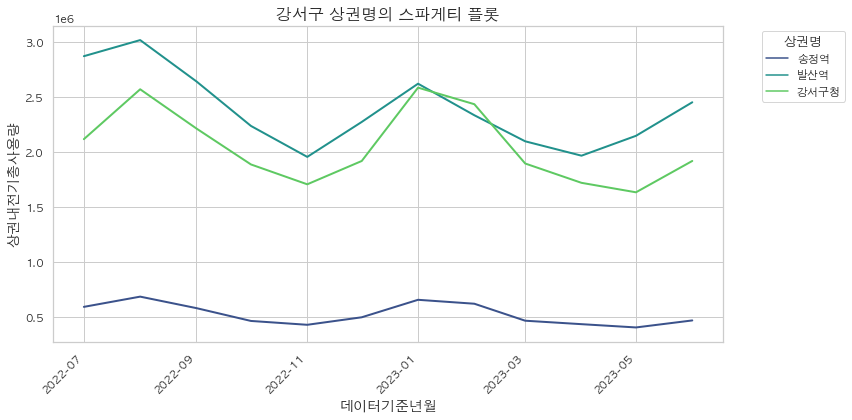

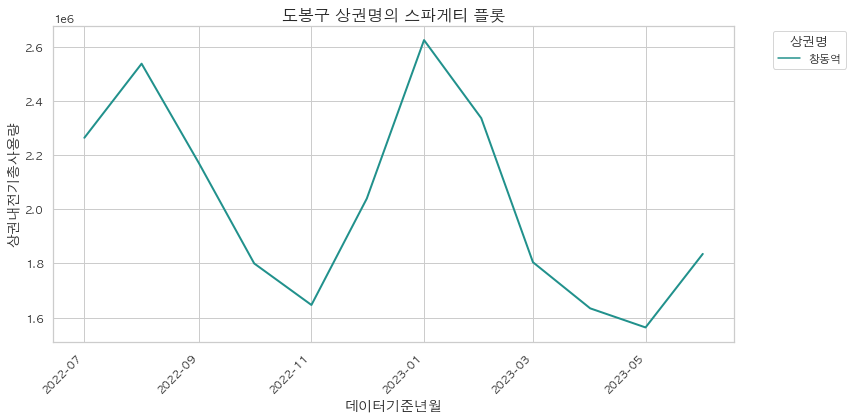

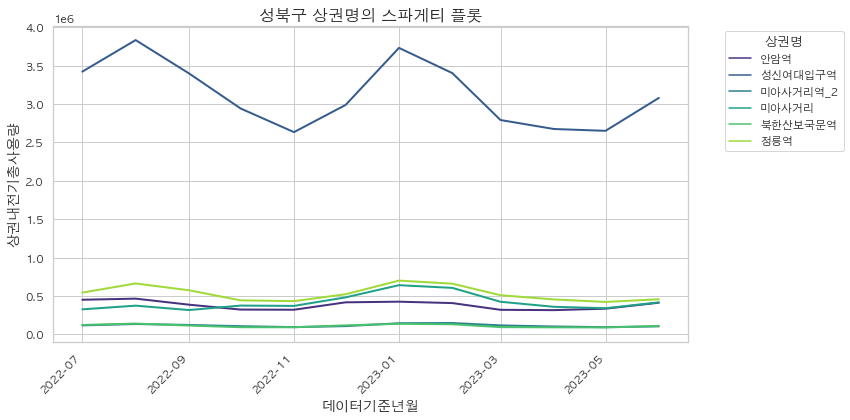

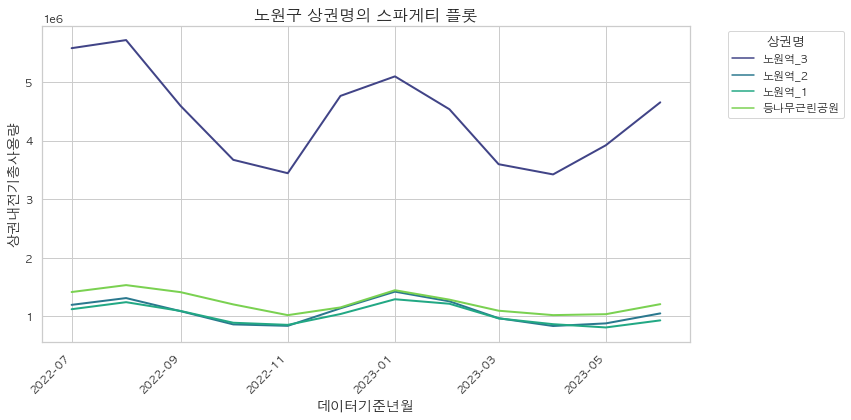

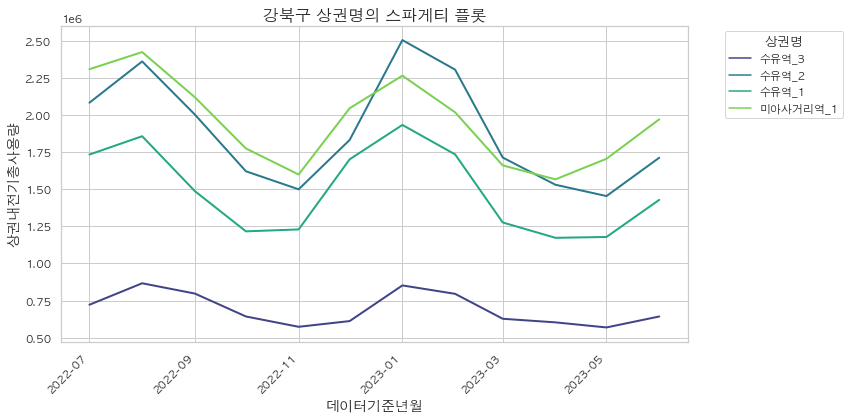

In [13]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 모든 시군구명에 대해 스파게티 플롯 그리기
for sigungu in combined_df['시군구명'].unique():
    # 시군구에 해당하는 데이터만 추출
    sigungu_data = combined_df[combined_df['시군구명'] == sigungu]

    # 스파게티 플롯 그리기
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='데이터기준년월', y='상권내전기총사용량', hue='상권명', data=sigungu_data, palette='viridis', lw=2)
    plt.title(f'{sigungu} 상권명의 스파게티 플롯', fontsize=16)
    plt.xlabel('데이터기준년월', fontsize=14)
    plt.ylabel('상권내전기총사용량', fontsize=14)
    plt.legend(title='상권명', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')  # legend 위치 조절
    plt.xticks(rotation=45, ha='right')  # x축 라벨 회전
    plt.tight_layout()  # 플롯 간 간격 조절
    plt.show()

In [14]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

In [15]:
# 서울시 중심 좌표
seoul_center = [37.5665, 126.9780]

# folium 지도 생성
m = folium.Map(location=seoul_center, zoom_start=11)

# MarkerCluster 생성
marker_cluster = MarkerCluster().add_to(m)

# 서울의 모든 구에 대해서
for _, row in combined_df.iterrows():
    # 각 구의 중심 좌표
    district_center = [float(row['상권좌표내용'][1]), float(row['상권좌표내용'][0])]

    # 상권내전기총사용량을 마커의 크기로 사용
    marker_size = row['상권내전기총사용량'] / 100000  # 크기를 조절할 수 있습니다.

    # 원형 마커 생성
    folium.CircleMarker(
        location=district_center,
        radius=marker_size,
        popup="상권내전기총사용량<br><br>"
                f"{row['상권명']}<br><br>"
              f"{row['데이터기준년월'].strftime('%Y-%m')}<br>",
        
        

        
        color='black',  # 마커의 테두리 색상
        fill=True,
        fill_color='blue',  # 마커의 내부 색상
        fill_opacity=0.6
    ).add_to(marker_cluster)

# 지도를 저장하고 노트북에서 바로 확인
m.save('electricity_usage_map_seoul.html')
# HTML 파일을 노트북 안에서 바로 보여주기
IFrame(src='electricity_usage_map_seoul.html', width=700, height=600)

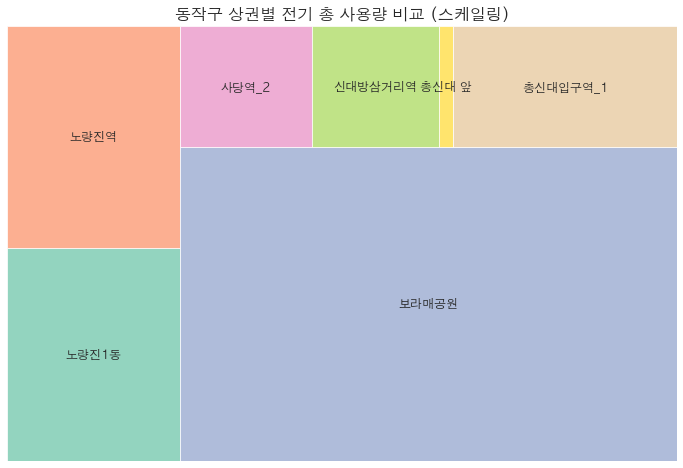

In [16]:
# 동작구 내에서 '상권명'별로 '상권내전기총사용량'에 대한 데이터프레임 생성
electricity_by_market_df = combined_df[combined_df['시군구명'] == '동작구'][['상권명', '상권내전기총사용량']]

# 각 상권의 전기 총 사용량 계산
total_electricity_by_market = electricity_by_market_df.groupby('상권명')['상권내전기총사용량'].sum()

# 스케일링하여 비율 계산
total_electricity_ratio = total_electricity_by_market / total_electricity_by_market.sum() * 100

# Seaborn 스타일 설정
sns.set_theme(style="whitegrid", palette="Set2")
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


# 트리플랏 그리기
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=total_electricity_ratio, 
    label=total_electricity_ratio.index, 
    alpha=0.7, 
    color=sns.color_palette(),
    text_kwargs={'fontsize': 12, 'fontweight': 'bold'}  # 텍스트 폰트 크기 및 굵기 조절
)
plt.title('동작구 상권별 전기 총 사용량 비교 (스케일링)', fontsize=16)
plt.axis('off')  # 축 제거
plt.show()

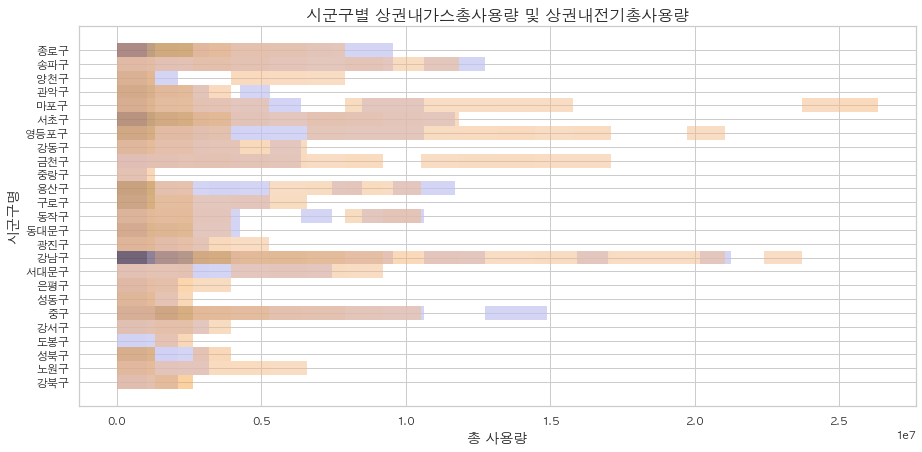

In [17]:
# 시군구별 "상권내가스총사용량"과 "상권내전기총사용량"에 대한 데이터프레임 생성
gas_electricity_df = combined_df[['시군구명', '상권내가스총사용량', '상권내전기총사용량']]

# 데이터프레임에서 0이 아닌 값만 선택 (0인 값이 많을 경우 히스토그램이 실제 분포를 잘 나타내지 않을 수 있음)
gas_electricity_df = gas_electricity_df[(gas_electricity_df['상권내가스총사용량'] > 0) & (gas_electricity_df['상권내전기총사용량'] > 0)]

# Seaborn 스타일 설정
sns.set(style="whitegrid")
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 플롯 설정
f, ax = plt.subplots(figsize=(15, 7))

# 히스토그램 그리기
sns.histplot(data=gas_electricity_df, y='시군구명', x='상권내가스총사용량', color='blue', alpha=0.7, bins=20)
sns.histplot(data=gas_electricity_df, y='시군구명', x='상권내전기총사용량', color='orange', alpha=0.5, bins=20)

# 플롯 및 라벨 설정
ax.set_xlabel('총 사용량', fontsize=14)
ax.set_ylabel('시군구명', fontsize=14)
ax.set_title('시군구별 상권내가스총사용량 및 상권내전기총사용량', fontsize=16)

# 범례 추가
#ax.legend(["상권내가스총사용량", "상권내전기총사용량"])

plt.show()

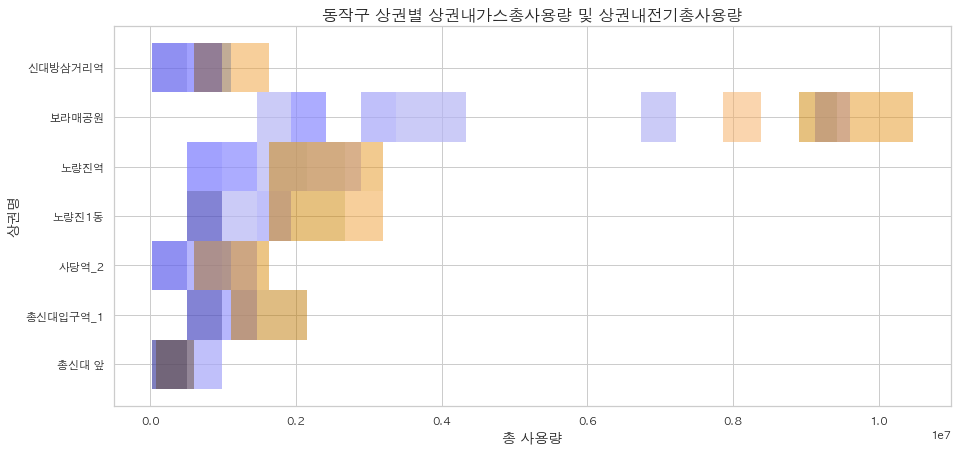

In [18]:
# 시군구별 "상권내가스총사용량"과 "상권내전기총사용량"에 대한 데이터프레임 생성
gas_electricity_df = combined_df[['시군구명', '상권명', '상권내가스총사용량', '상권내전기총사용량']]

# 데이터프레임에서 0이 아닌 값만 선택 (0인 값이 많을 경우 히스토그램이 실제 분포를 잘 나타내지 않을 수 있음)
gas_electricity_df = gas_electricity_df[(gas_electricity_df['상권내가스총사용량'] > 0) & (gas_electricity_df['상권내전기총사용량'] > 0)]

# 동작구에 해당하는 데이터 추출
dongjak_data = gas_electricity_df[gas_electricity_df['시군구명'] == '동작구']

# Seaborn 스타일 설정
sns.set(style="whitegrid")
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 플롯 설정
f, ax = plt.subplots(figsize=(15, 7))

# 히스토그램 그리기
sns.histplot(data=dongjak_data, y='상권명', x='상권내가스총사용량', color='blue', alpha=0.7, bins=20, label='가스 총 사용량', legend=True)
sns.histplot(data=dongjak_data, y='상권명', x='상권내전기총사용량', color='orange', alpha=0.5, bins=20, label='전기 총 사용량', legend=True)

# 플롯 및 라벨 설정
ax.set_xlabel('총 사용량', fontsize=14)
ax.set_ylabel('상권명', fontsize=14)
ax.set_title('동작구 상권별 상권내가스총사용량 및 상권내전기총사용량', fontsize=16)

# 범례 추가
#ax.legend(["가스 총 사용량", "전기 총 사용량"])

plt.show()


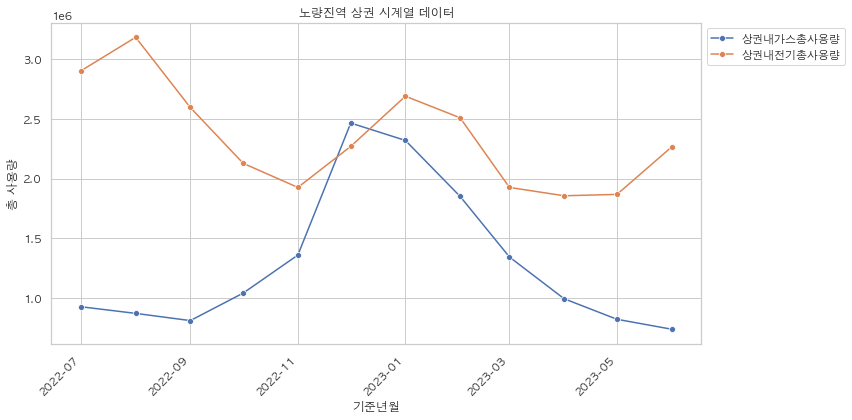

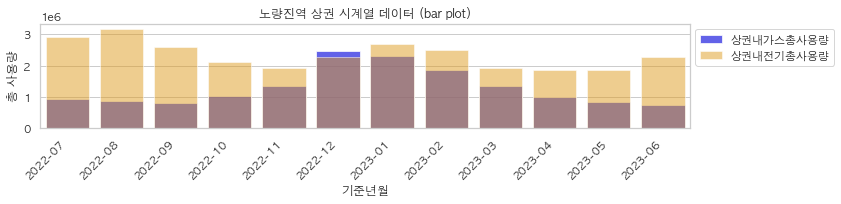

In [19]:
# '노량진역' 상권에 대한 데이터 추출
noryangjin_data = combined_df[combined_df['상권명'] == '노량진역']

# 데이터 프레임에서 필요한 열 선택
time_series_df = noryangjin_data[['데이터기준년월', '상권내가스총사용량', '상권내전기총사용량']]

# '데이터기준년월' 열을 날짜형으로 변환
time_series_df['데이터기준년월'] = pd.to_datetime(time_series_df['데이터기준년월'])

# Seaborn 스타일 설정
sns.set(style="whitegrid")
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 시계열 플롯 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(x='데이터기준년월', y='상권내가스총사용량', data=time_series_df, label='상권내가스총사용량', marker='o')
sns.lineplot(x='데이터기준년월', y='상권내전기총사용량', data=time_series_df, label='상권내전기총사용량', marker='o')

# 플롯 및 라벨 설정
plt.title('노량진역 상권 시계열 데이터')
plt.xlabel('기준년월')
plt.ylabel('총 사용량')
plt.xticks(rotation=45, ha='right')  # x축 라벨 회전
# 레전드를 그래프 밖으로 옮기기
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()  # 레이아웃 조절


# 바 플롯 그리기
plt.figure(figsize=(12, 3))
sns.barplot(x='데이터기준년월', y='상권내가스총사용량', data=time_series_df, color='blue', alpha=0.7, label='상권내가스총사용량')
sns.barplot(x='데이터기준년월', y='상권내전기총사용량', data=time_series_df, color='orange', alpha=0.5, label='상권내전기총사용량')

# 플롯 및 라벨 설정
plt.title('노량진역 상권 시계열 데이터 (bar plot)')
plt.xlabel('기준년월')
plt.ylabel('총 사용량')
plt.xticks(rotation=45, ha='right')  # x축 라벨 회전
# 레전드를 그래프 밖으로 옮기기
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
# x축 눈금 설정
xticks = [date.strftime('%Y-%m') for date in time_series_df['데이터기준년월']]
plt.xticks(range(len(xticks)), xticks, rotation=45, ha='right')
plt.tight_layout()  # 레이아웃 조절

plt.show()

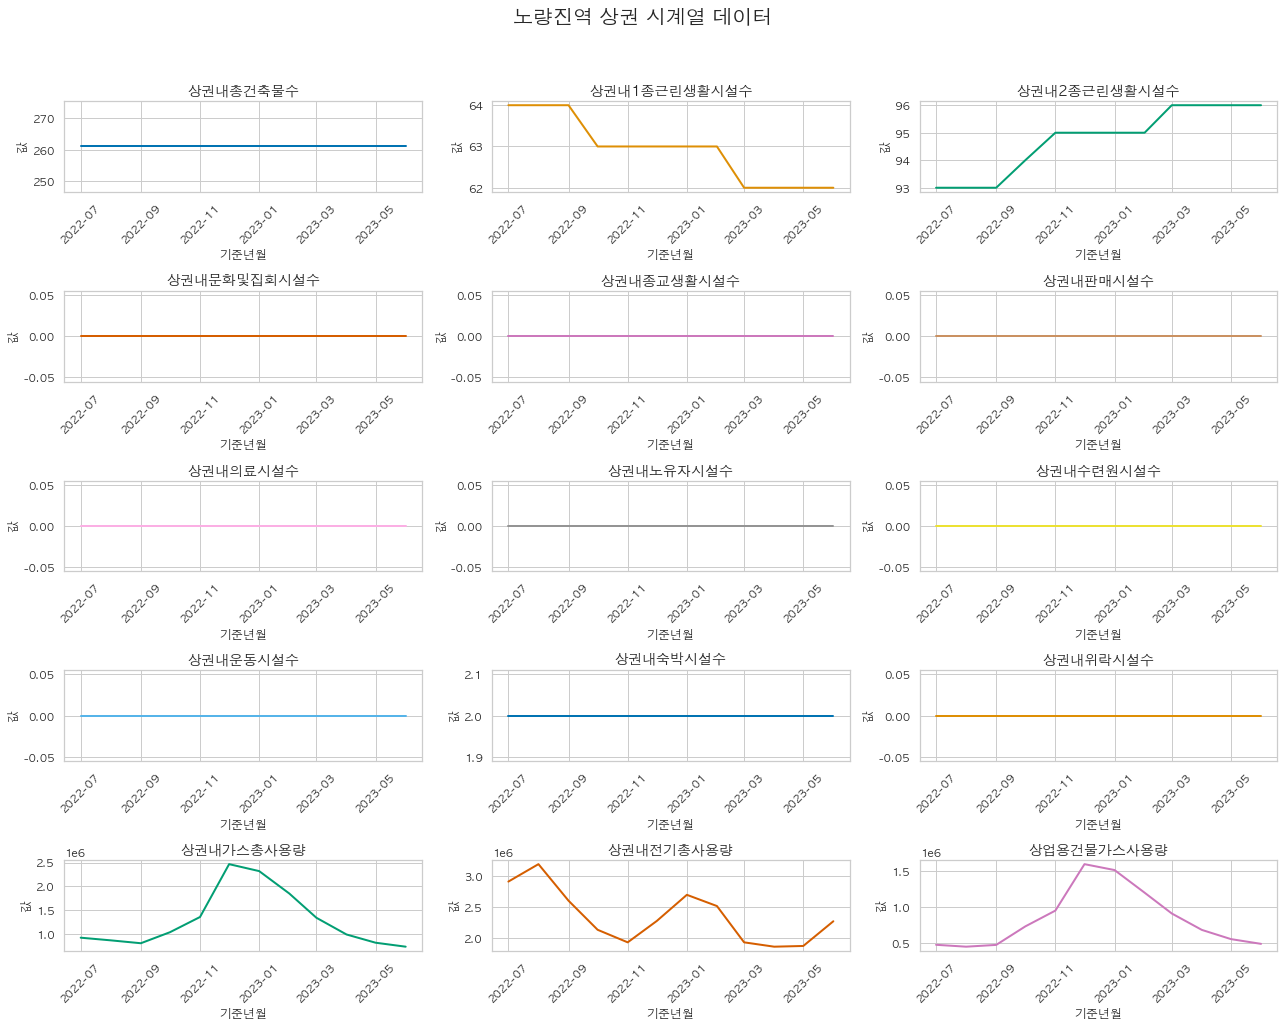

In [20]:
# 선택한 특성들
selected_features = ['상권내총건축물수', '상권내1종근린생활시설수', '상권내2종근린생활시설수',
                     '상권내문화및집회시설수', '상권내종교생활시설수', '상권내판매시설수',
                     '상권내의료시설수', '상권내노유자시설수', '상권내수련원시설수',
                     '상권내운동시설수', '상권내숙박시설수', '상권내위락시설수',
                     '상권내가스총사용량', '상권내전기총사용량', '상업용건물가스사용량']

# 시계열 데이터프레임 생성
time_series_df = combined_df[combined_df['상권명'] == '노량진역'][['데이터기준년월'] + selected_features]

# Seaborn 스타일 설정
sns.set_theme(style="whitegrid")
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그래프 생성
fig, axes = plt.subplots(5, 3, figsize=(18, 15))
fig.suptitle('노량진역 상권 시계열 데이터', fontsize=20)

# 색상 매핑 딕셔너리
color_dict = dict(zip(selected_features, sns.color_palette("colorblind", len(selected_features))))

for i, feature in enumerate(selected_features):
    row, col = divmod(i, 3)
    axes[row, col].plot(time_series_df['데이터기준년월'], time_series_df[feature], label=feature, linewidth=2, color=color_dict[feature])
    axes[row, col].set_title(feature, fontsize=14)
    axes[row, col].set_xlabel('기준년월', fontsize=12)
    axes[row, col].set_ylabel('값', fontsize=12)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

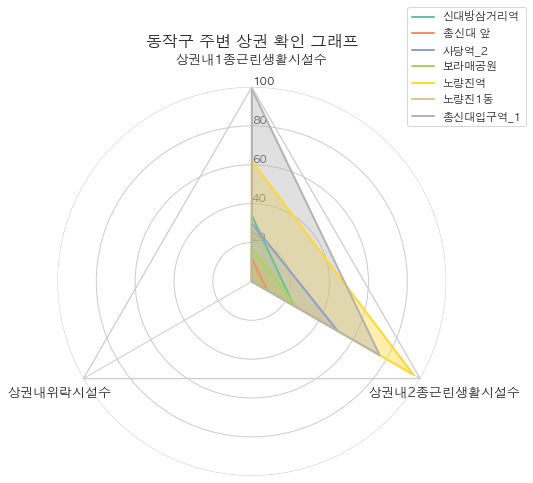

In [22]:
# 선택한 특성 중 일부
selected_features_subset = ['상권내1종근린생활시설수', '상권내2종근린생활시설수', '상권내위락시설수']

# 동작구 데이터 선택
time_series_df = combined_df[combined_df['시군구명'] == '동작구'][['데이터기준년월', '상권명'] + selected_features_subset]
time_series_df = time_series_df[time_series_df['데이터기준년월'] == '2023-06-01']
time_series_df.drop(['데이터기준년월'], axis=1, inplace=True)
time_series_df.reset_index(drop=True, inplace=True)

labels = time_series_df.columns[1:]
num_labels = len(labels)

angles = [x / float(num_labels) * (2 * pi) for x in range(num_labels)]
angles += angles[:1]

my_palette = plt.cm.get_cmap("Set2", len(time_series_df.index))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
fig.set_facecolor('white')

for i, row in time_series_df.iterrows():
    color = my_palette(i)
    data = row[1:].tolist()
    data += [data[0]]  # 처음과 마지막을 연결하여 폐곡선을 만듭니다.

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], labels, fontsize=13)
    ax.tick_params(axis='x', which='major', pad=15)
    ax.set_rlabel_position(0)
    plt.ylim(0, 100)

    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row['상권명'])
    ax.fill(angles, data, color=color, alpha=0.4)

for g in ax.yaxis.get_gridlines():
    g.get_path()._interpolation_steps = len(labels)

spine = Spine(axes=ax, spine_type='circle', path=Path.unit_regular_polygon(len(labels)))
spine.set_transform(Affine2D().scale(.5).translate(.5, .5) + ax.transAxes)
ax.spines = {'polar': spine}

plt.legend(loc=(0.9, 0.9))
plt.title('동작구 주변 상권 확인 그래프', fontsize=16, fontweight='bold')

# 여백 조절
plt.subplots_adjust(top=0.8)

plt.show()

# 2. 부동산 거래-시세정보

In [23]:
ls "data/연립다세대_주택_월세전환율/"

ES1012AK00101MM2209_csv.csv  ES1012AK00101MM2304_csv.csv
ES1012AK00101MM2210_csv.csv  ES1012AK00101MM2305_csv.csv
ES1012AK00101MM2211_csv.csv  ES1012AK00101MM2306_csv.csv
ES1012AK00101MM2212_csv.csv  ES1012AK00101MM2307_csv.csv
ES1012AK00101MM2301_csv.csv  ES1012AK00101MM2308_csv.csv
ES1012AK00101MM2302_csv.csv  ES1012AK00101MM2309_csv.csv
ES1012AK00101MM2303_csv.csv


In [24]:
directory = "data/연립다세대_주택_월세전환율/"
all_data = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)

        # 파일 이름에 따라 구분자 지정
        if "ES1012AK00101MM2305" in filename or "ES1012AK00101MM2306" in filename or \
           "ES1012AK00101MM2307" in filename or "ES1012AK00101MM2308" in filename or \
           "ES1012AK00101MM2309" in filename:
            sep = '|'
        else:
            sep = ','

        # CSV 파일을 읽어와 DataFrame에 추가
        df = pd.read_csv(filepath, sep=sep)
        all_data = pd.concat([all_data, df], ignore_index=True)

all_data = all_data[all_data['SIDO_NM'] == '서울특별시']
column_mapping = {
    'RHMH_HOUSE_MTHT_CONV_RATE_INFO_NO': '주택임대전환율정보번호',
    'SIDO_NM': '시도명',
    'SIGNGU_NM': '시군구명',
    'TNSHP_NM': '군구명',
    'EMD_NM': '읍면동명',
    'HONO_NM': '번지',
    'SMOEU': '전용면적',
    'CNTRCT_YM': '계약년월',
    'CNTRCT_DE': '계약일',
    'MTHT_GTN': '월세보증금',
    'MNTH_RENTCG': '월임대료',
    'FLR': '층',
    'BILDNG_YR': '건축연도',
    'CNTRCT_CLSF_NM': '계약구분명',
    'SUSAR_NM': '용도지역명',
    'NMHSH': '세대수',
    'AVE_LFSTS_PC_MINM_AMT': '평균전세가격최소',
    'AVE_LFSTS_PC_MAX_AMT': '평균전세가격최대',
    'MTHT_CONV_RT_MINM_VL': '월세전환율최소',
    'MTHT_CONV_RT_MAX_VL': '월세전환율최대'
}

# 데이터프레임의 컬럼을 한글로 변환
all_data.columns = [column_mapping.get(col, col) for col in all_data.columns]

# '계약년월'을 'yyyymm' 형식에서 'yyyy-mm' 형식으로 변환
all_data['계약년월'] = pd.to_datetime(all_data['계약년월'], format='%Y%m')
all_data['건축연도'] = all_data['건축연도'].fillna(0).astype(int)
all_data['월세보증금'] = all_data['월세보증금'].str.replace(',', '').fillna(0).astype(int)
all_data['평균전세가격최소'] = all_data['평균전세가격최소'].str.replace(',', '').fillna(0).astype(int)
all_data['평균전세가격최대'] = all_data['평균전세가격최대'].str.replace(',', '').fillna(0).astype(int)


# 필요 없는 컬럼 제거
columns_to_remove = ['주택임대전환율정보번호', '시도명', '군구명', '번지', '계약일']
all_data = all_data.drop(columns=columns_to_remove)
all_data.sort_values('계약년월', inplace=True)
all_data.reset_index(drop=True, inplace=True)
all_data

,시군구명,읍면동명,전용면적,계약년월,월세보증금,월임대료,층,건축연도,계약구분명,용도지역명,세대수,평균전세가격최소,평균전세가격최대,월세전환율최소,월세전환율최대
0,성북구,석관동,12.95,2022-07-01,39,3.0,4,2013,신규,NaN,NaN,535,628,7.0,8.0
1,강동구,성내동,28.82,2022-07-01,486,1.0,2,2015,신규,NaN,NaN,630,739,7.0,12.0
2,성북구,돈암동,21.32,2022-07-01,0,1.0,2,1965,NaN,NaN,NaN,669,785,1.0,2.0
3,성북구,돈암동,21.32,2022-07-01,14,1.0,2,1965,NaN,NaN,NaN,669,785,1.0,2.0
4,은평구,대조동,41.94,2022-07-01,48,1.0,5,2009,신규,NaN,NaN,464,545,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178015,영등포구,영등포동7가,34.76,2023-09-01,0,0.6,12,2018,신규,NaN,16.0,0,0,7.9,18.5
178016,도봉구,창동,35.46,2023-09-01,0,1.1,-1,1994,신규,NaN,15.0,0,0,3.6,3.8
178017,영등포구,영등포동7가,25.11,2023-09-01,0,0.8,9,2018,신규,준주거지역,12.0,0,0,15.7,106.7
178018,도봉구,창동,64.20,2023-09-01,0,0.7,5,2003,갱신,NaN,9.0,0,0,3.0,3.2


In [25]:
all_data.columns

Index(['시군구명', '읍면동명', '전용면적', '계약년월', '월세보증금', '월임대료', '층', '건축연도', '계약구분명',
       '용도지역명', '세대수', '평균전세가격최소', '평균전세가격최대', '월세전환율최소', '월세전환율최대'],
      dtype='object')

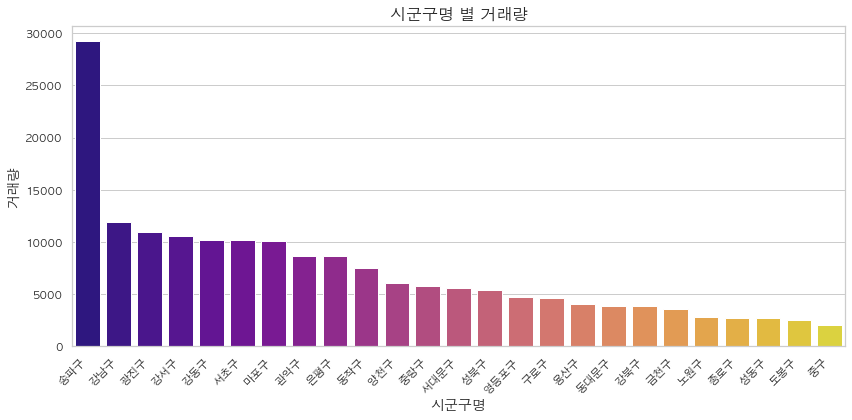

In [26]:
# 시군구명 별로 count value 계산
count_by_sigungu = all_data['시군구명'].value_counts()

# Seaborn 스타일 설정
sns.set(style="whitegrid")
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x=count_by_sigungu.index, y=count_by_sigungu.values, palette="plasma")  # 색상을 'plasma'로 변경
plt.title('시군구명 별 거래량', fontsize=16)
plt.xlabel('시군구명', fontsize=14)
plt.ylabel('거래량', fontsize=14)
plt.xticks(rotation=45, ha='right')  # x축 라벨 회전
plt.tight_layout()  # 레이아웃 조절

plt.show()

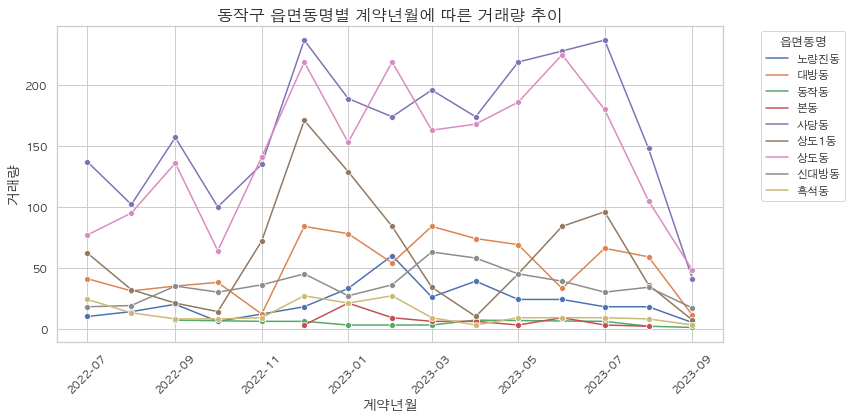

In [27]:
# '동작구'에 해당하는 데이터 추출
dong_data = all_data[all_data['시군구명'] == '동작구']

# '읍면동명'별로 거래량 추이를 구하기
monthly_deal_count_by_dong = dong_data.groupby(['읍면동명', '계약년월']).size().reset_index(name='거래량')

# Seaborn 테마 설정
sns.set_theme(style="whitegrid")
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 시각화 설정
plt.figure(figsize=(12, 6))
sns.lineplot(x='계약년월', y='거래량', hue='읍면동명', data=monthly_deal_count_by_dong, marker='o')

# 그래프 제목과 축 레이블 설정
plt.title('동작구 읍면동명별 계약년월에 따른 거래량 추이', fontsize=16)
plt.xlabel('계약년월', fontsize=14)
plt.ylabel('거래량', fontsize=14)

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend(title='읍면동명', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show()

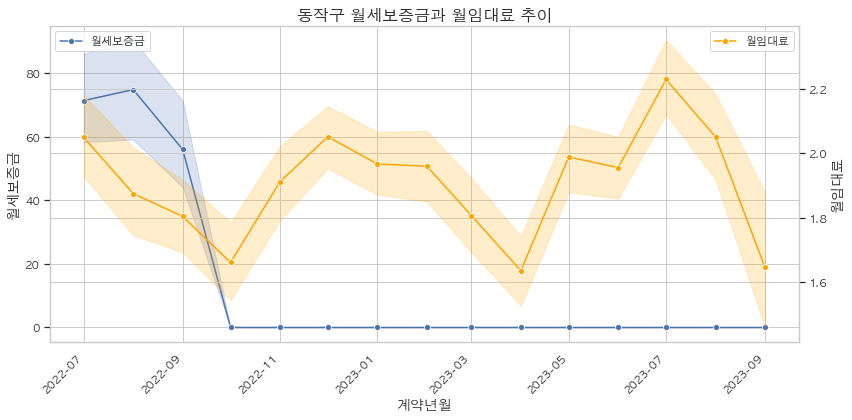

In [39]:
# '동작구'에 해당하는 데이터 추출
dong_data = all_data[all_data['시군구명'] == '동작구']

# Seaborn 테마 설정
sns.set_theme(style="whitegrid")
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 시각화 설정
fig, ax1 = plt.subplots(figsize=(12, 6))

# 라인플랏 그리기 (월세보증금)
sns.lineplot(x='계약년월', y='월세보증금', data=dong_data, label='월세보증금', marker='o', ax=ax1)

# y축 레이블 설정
ax1.set_ylabel('월세보증금', fontsize=14)
ax1.set_xlabel('계약년월', fontsize=14)
ax1.set_title('동작구 월세보증금과 월임대료 추이', fontsize=16)

# x축 라벨 회전
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# 범례 표시
ax1.legend(loc='upper left')

# 두 번째 y축 추가 (월임대료)
ax2 = ax1.twinx()
sns.lineplot(x='계약년월', y='월임대료', data=dong_data, label='월임대료', marker='o', color='orange', ax=ax2)
ax2.set_ylabel('월임대료', fontsize=14)
ax2.legend(loc='upper right')

# 그래프 표시
plt.tight_layout()
plt.show()

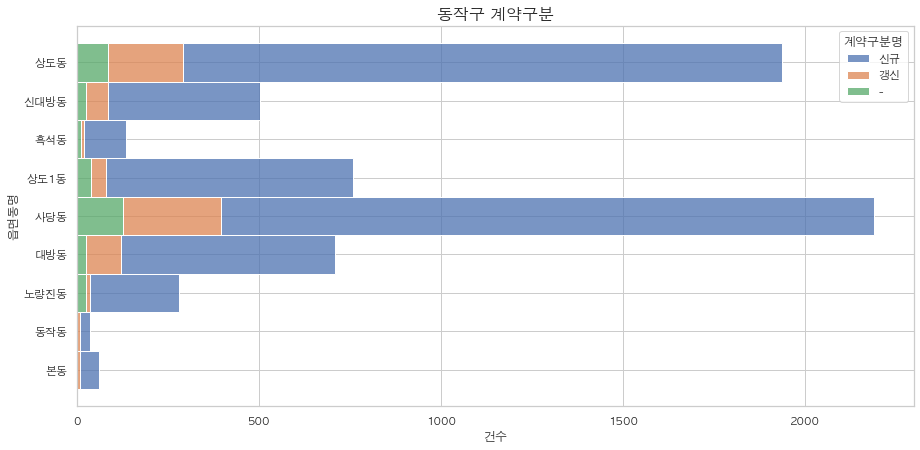

In [56]:
# '동작구'에 해당하는 데이터 추출
dong_data = all_data[all_data['시군구명'] == '동작구']

# Seaborn 테마 설정
sns.set_theme(style="whitegrid")
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=dong_data, y='읍면동명', color='orange', hue='계약구분명', multiple="stack")
ax.set_xlabel('건수')
ax.set_ylabel('읍면동명')
ax.set_title('동작구 계약구분', fontsize=16)
plt.show()